## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r"C:\Users\hp\.spyder-py3\OnlineRetail.csv",encoding ='unicode_escape')

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# head gives the top 5 rows of the given dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [7]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
# describe() gives the overall descriptive summary of the dataframe
data.describe().T       # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [10]:
#  Check the shape (number of column and rows) in the dataset
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 541909 , Columns 8


## **Preprocessing the dataset**
####  **In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms does not support missing values, that's why we check missing values first.**

### **Checking for Missing values in the dataset**

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64


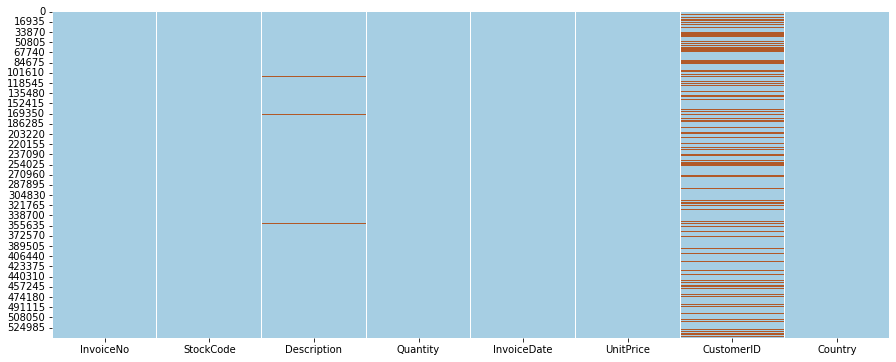

In [11]:
# lets check the total null values in our dataset.
# .sort_values sorting the dataset in ascending order and if you want to make it reverse just write False in bracket.
print(data.isna().sum().sort_values(ascending = False))

# Visualising null values using heatmap
plt.rcParams['figure.figsize'] = (15, 6)       
sns.heatmap(data.isnull(), cbar = False, cmap='Paired')

### **With the help of heatmap we can clearly see that Description and  CustomerID have null values.**
*(Around 135080 null values in CustomerID and 1454 in Description.)*

In [12]:
# dropping all the missing values from our dataset 
data.dropna(inplace=True)

In [13]:
data.isna().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 5225


In [15]:
# Dropping the duplicate values from the dataset
data.drop_duplicates(inplace = True)

In [16]:
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 401604 , Columns 8


### **After dropping null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.** 

In [17]:
# Creating a copy of dataframe 
df = data.copy()

### **Here we creating a copy of dataframe because whatever we applying a conditions on new data so that it doesn't affect our original dataset.**

In [18]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
print("Number of transactions: ", df['InvoiceNo'].nunique())          # Total unique transactions 
print("Number of products bought: ", df['StockCode'].nunique())       # Total no. of unique products bought 
print("Number of customers:", df['CustomerID'].nunique())             # Total no. of unique customers 
print('Number of countries: ', df['Country'].nunique())               # Total no. of unique countries            

Number of transactions:  22190
Number of products bought:  3684
Number of customers: 4372
Number of countries:  37


# **Exploratory Data Analysis (EDA)**

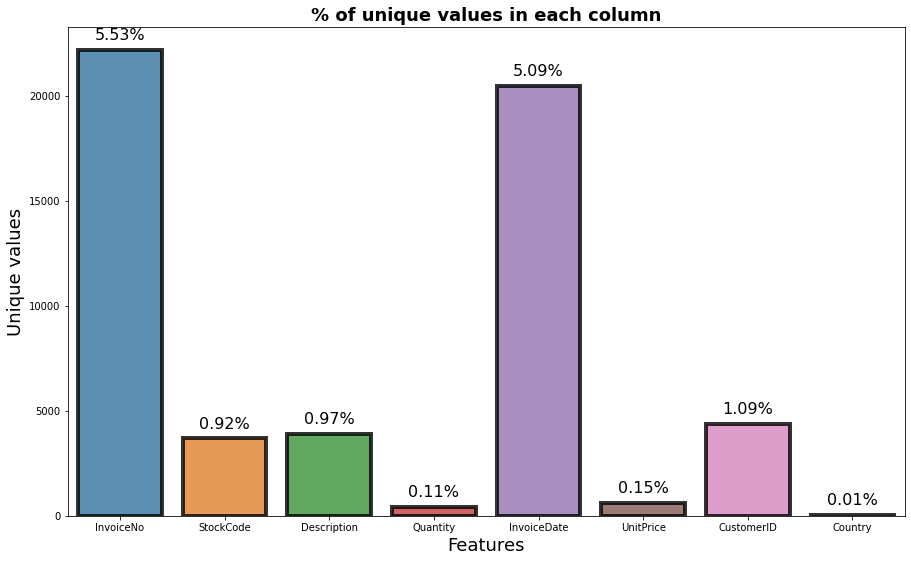

In [20]:
unique_featues_df = pd.DataFrame()
unique_featues_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_featues_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,9))

splot = sns.barplot(x=unique_featues_df['Features'], y=unique_featues_df['Uniques'], alpha=0.8, edgecolor = 'black', lw = 4)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 16)
    
plt.title('% of unique values in each column', weight='bold', size=18)
plt.ylabel('Unique values', size=18)
plt.xlabel('Features', size=18)
plt.show()

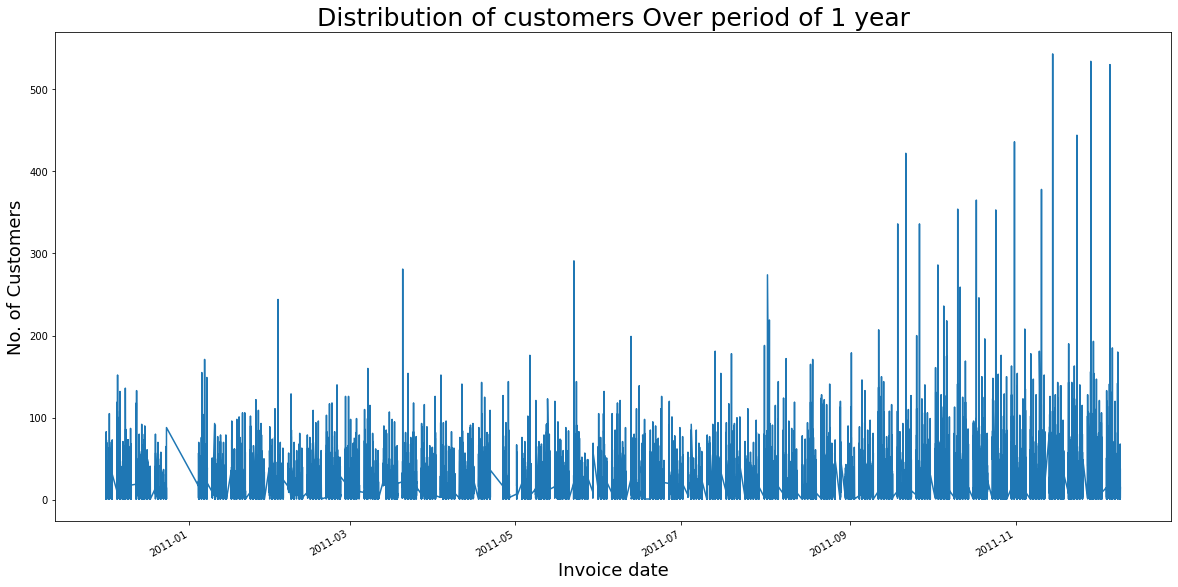

In [21]:
# customer distribution in 1 year time period
plt.figure(figsize=(20,10))
customer_distribution = data.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.show()

### **Let's explore Country on the basis of maximum order**

In [22]:
# Top 10 countries who's buying maximum products
Top_10_country = df['Country'].value_counts().reset_index()
Top_10_country['Country %']= Top_10_country['Country']*100/df['Country'].count()     # Adding country percentage column to top 10 countries data frame
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country[:10]

,Country_Name,Count,Country %
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476
5,Netherlands,2371,0.590383
6,Belgium,2069,0.515184
7,Switzerland,1877,0.467376
8,Portugal,1471,0.366281
9,Australia,1258,0.313244


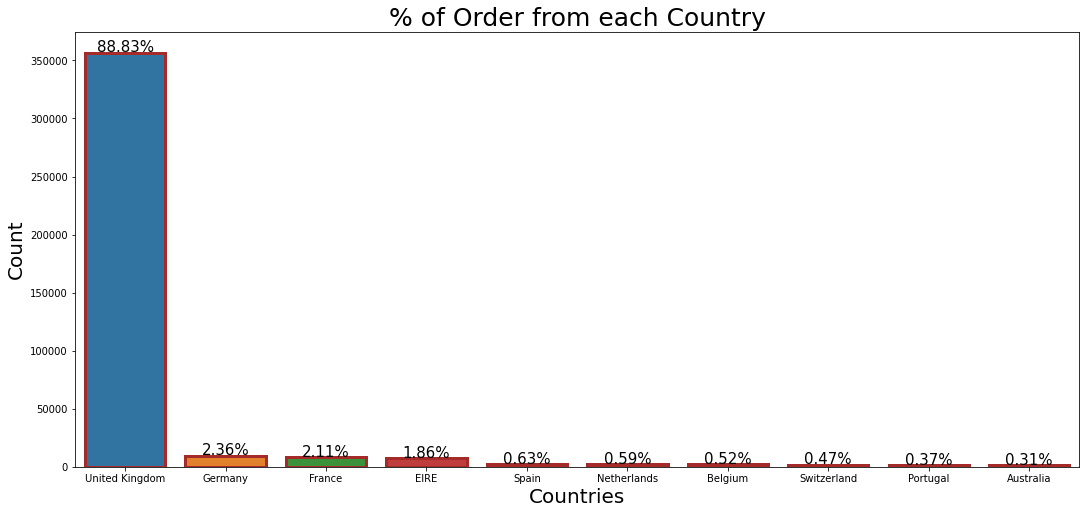

In [23]:
# Barplot of Top 10 countries who's buying maximum products
fig, ax = plt.subplots(figsize = (18,8))
splot = sns.barplot(x='Country_Name',y='Count',data=Top_10_country[:10], edgecolor = 'brown', lw = 3)
plt.title('% of Order from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 15)

### **Maximum orders are recieved from United Kingdom (Around 90% market covering). As expected since company is a UK based, then it is followed by Germany, France, EIRE, etc.**

# **checking for cancelled orders**
### **Given in descripton**

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [24]:
# Let us now look at the number of canceled orders in the data.
# String to be searched in start of string 
search = "C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [25]:
cancel_order.shape

(8872, 8)

### **This shows that 8872 were such orders which was cancelled.**

In [26]:
cancel_order_country_top10 = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top10 = cancel_order_country_top10.sort_values('InvoiceNo',ascending=False, ignore_index=True)
cancel_order_country_top10.rename(columns={'InvoiceNo': 'Cancel_Order'}, inplace=True)
cancel_order_country_top10.head(10)

,Country,Cancel_Order
0,United Kingdom,7501
1,Germany,453
2,EIRE,247
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


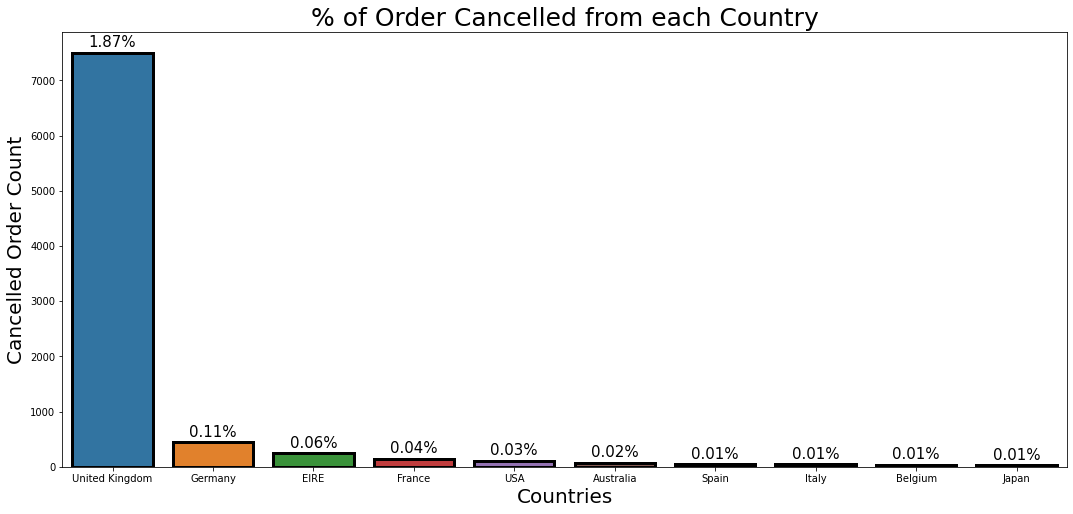

In [27]:
# Barplot of Top 10 countries who's buying maximum products
fig, ax = plt.subplots(figsize = (18,8))
splot = sns.barplot(x='Country',y='Cancel_Order', data = cancel_order_country_top10[:10], edgecolor = 'black', lw = 3)

plt.title('% of Order Cancelled from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Cancelled Order Count', SIZE = 20)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 15)

### **Maximum number of orders are cancelled from United Kindom only**

In [28]:
# We have to deal with those data of InvoiceNo which not containing 'C'
df = df[~df['InvoiceNo'].str.contains('C', na = False)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
# Again checking rows and columns
df.shape

(392732, 8)

In [30]:
# Creating amount column by multiply quantity with unitprice
df['Amount'] = df.Quantity*df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# Checking which CustomerID spend maximum amount.
PercentSales = df.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False).iloc[:10].reset_index()
PercentSales

,CustomerID,Amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


Text(0.5, 1.0, 'Maximum order w.r.to CustomerID')

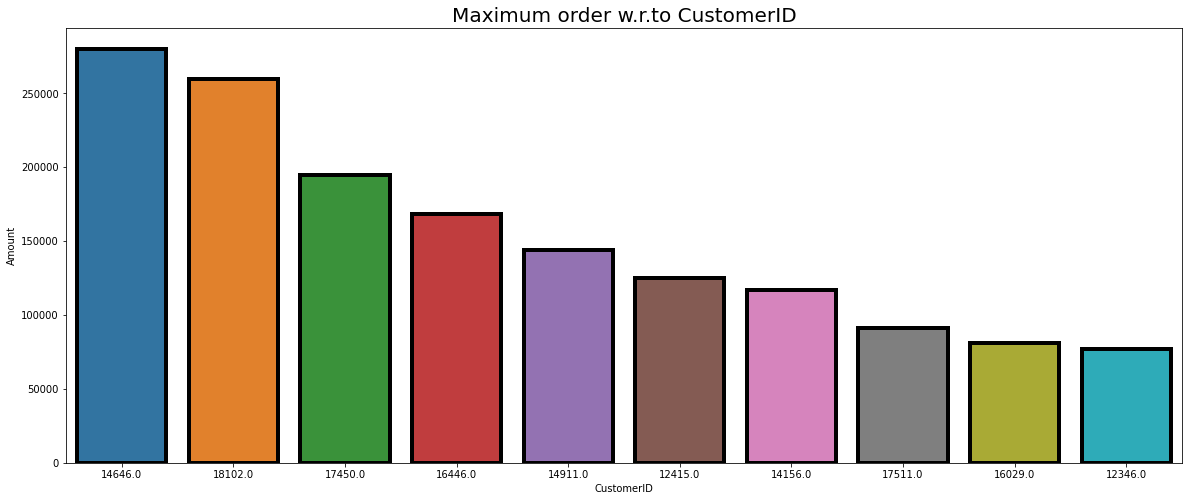

In [32]:
# Same with Barplot
plt.figure(figsize=(20,8))
sns.barplot(x="CustomerID", y="Amount", data = PercentSales, order = PercentSales['CustomerID'], edgecolor = 'black', lw = 4)
plt.title('Maximum order w.r.to CustomerID', size = 20)

In [33]:
# Top 10 products name which were repeatedly sold
product_df = df['Description'].value_counts().reset_index()
product_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)
product_df[:10]

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390
5,LUNCH BAG RED RETROSPOT,1303
6,SET OF 3 CAKE TINS PANTRY DESIGN,1152
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1078
9,PACK OF 72 RETROSPOT CAKE CASES,1050


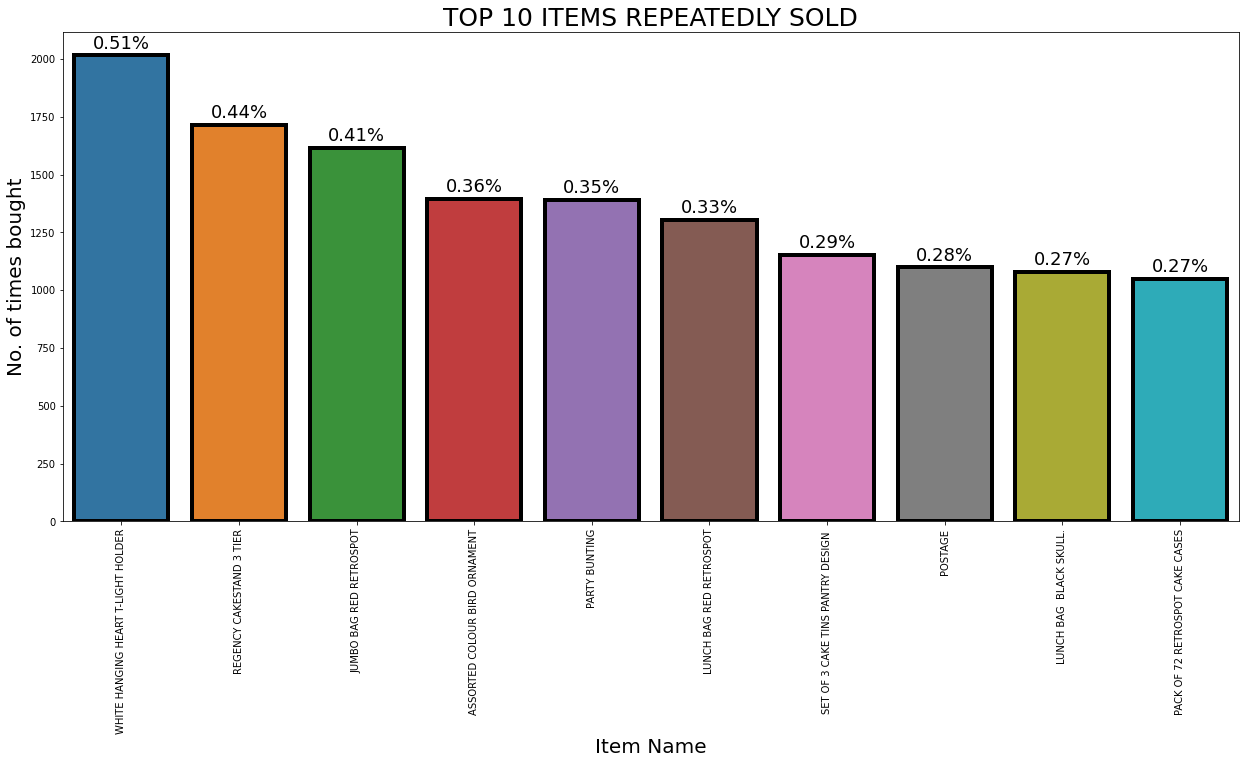

In [34]:
# Barplot of the top 10 most repeatedly sold items
fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x='Description_Name',y='Count',data = product_df[:10], edgecolor = 'black',lw =4)
plt.xlabel('Item Name', SIZE = 20)
plt.ylabel('No. of times bought', SIZE = 20)
plt.title('TOP 10 ITEMS REPEATEDLY SOLD', SIZE = 25)
plt.tight_layout()
plt.xticks(rotation = 90)   # by using xticks we rotate our column labels to 90 degree.
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+30, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 18)

###**WHITE HANGING HEART T-LIGHT HOLDER is among the top product which were reretedly sold**
   

### **Checking the distribution of numerical column to understand the data distribution is whether positively skewed, negative skewed or symetric.**

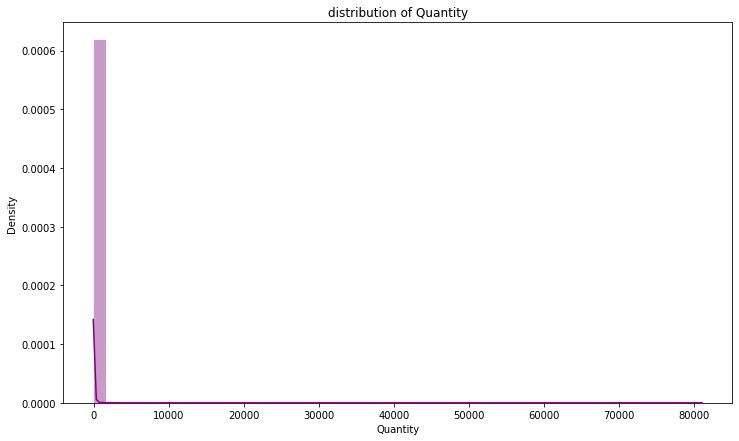

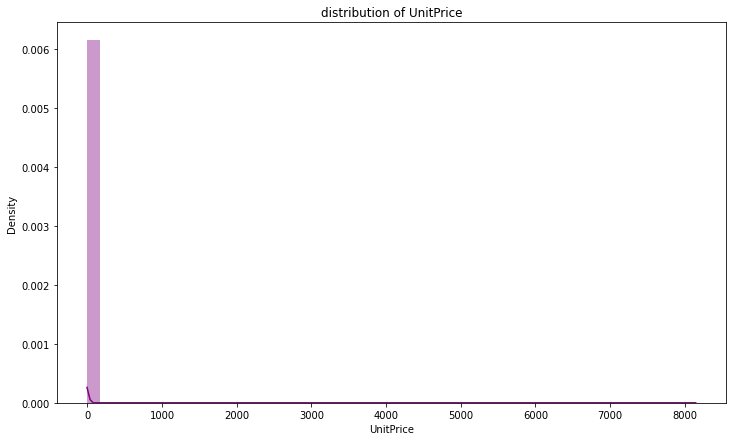

In [35]:
#distribution of Quantity
plt.figure(figsize=(12,7))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="Purple")

#distribution of UnitPrice
plt.figure(figsize=(12,7))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="Purple")

###**positively skewed : since we are not find anything from this type of graph so we use log transformation it basically shrink the data from large to small scale**

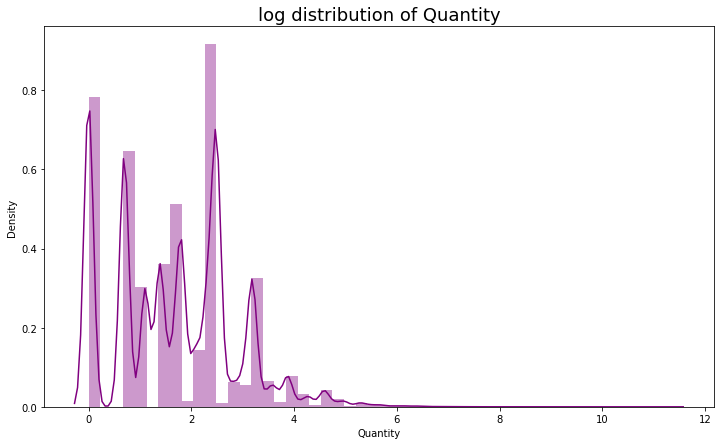

In [36]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(12,7))
plt.title('log distribution of Quantity', SIZE =18)
sns.distplot(np.log(df['Quantity']),color="Purple")

###**Now it is much better to understand the distibution of quantity column**

# **Convert InvoiceDate columns into date time format**

In [37]:
# Extracting new feature from Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M")
df['Day'] = df['InvoiceDate'].dt.day_name()        # gives the name of the days like monday,tuesday,...

df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)
df['Month']=df['InvoiceDate'].dt.month_name()  # Creating new feature Month which gives the month like january, february, etc.
df[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Day,year,month_num,day_num,hour,minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday,2010,12,1,8,26,December
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,2010,12,1,8,28,December
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,2010,12,1,8,28,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,Wednesday,2010,12,1,8,34,December


### **We are creating some new features from Invoicedate like hours, year, month_num, day_num, hour, minute, and Month**

### **Checking Sales Day wise**

In [38]:
# on which day most of the order is placed 
day_df = df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


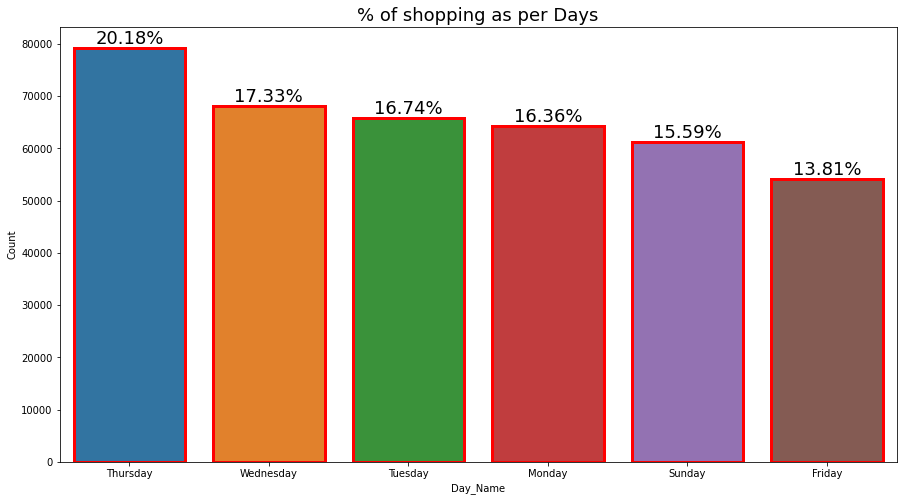

In [39]:
# Plot the number of shopping as per days
fig, ax = plt.subplots(figsize = (15,8))
plt.title('% of shopping as per Days', SIZE= 18)
sns.barplot(x= 'Day_Name', y='Count',data=day_df, edgecolor = 'red', lw=3)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 18)

### **Maximum number of shopping in Thursday, followed by Wednesday and Tuesday and less on Friday & Sunday.**

### **Checking Monthly wise selling**

In [40]:
# Monthly purchases
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name','Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


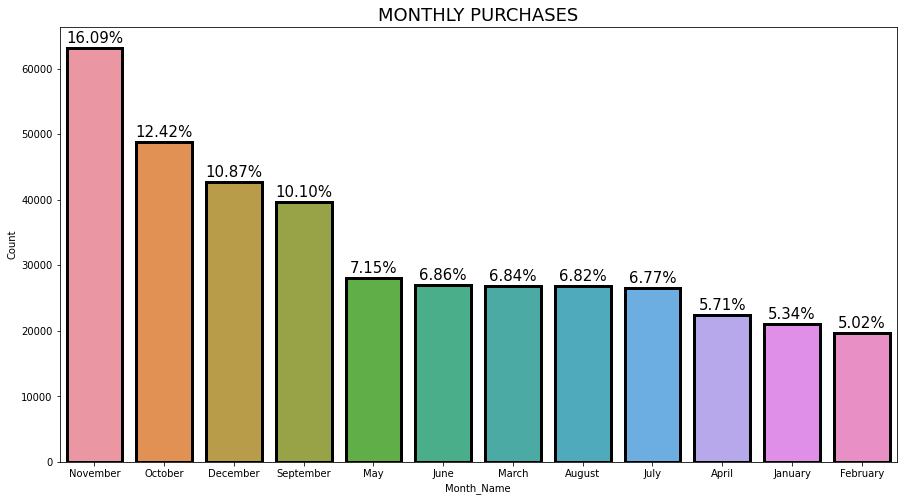

In [41]:
#same through visualization
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='Month_Name',y='Count',data = month_df, edgecolor = 'black', lw=3)
plt.title('MONTHLY PURCHASES', SIZE = 18)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 15)

* ### **Most of the bookings were made in the month of November, October, December and September, so these months are peak in business expansion and need to look after more customer satisfaction.**

* ### **And less bookings were made in the month of April, january and February**

### **At what time customer purchases most items?**

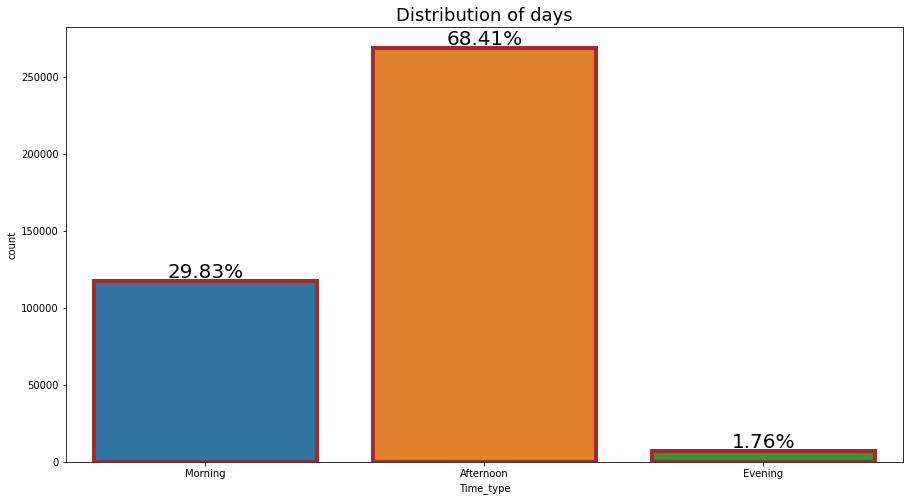

In [42]:
# distribution of days in Morining, Afternoon and Evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

df['Time_type']=df['hour'].apply(time_type)

#Plotting distribute of day in Morining, Afternoon and Evening
fig, ax = plt.subplots(figsize = (15,8))
plt.title('Distribution of days', SIZE = 18)
sns.countplot(x='Time_type',data=df,  edgecolor = 'brown', lw=4)
for p in ax.patches:  
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+2000, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 20)

###**Most of the customers have purches the items in Afternoon (approx 68%), moderate numbers of customers have purches the items in Morning (approx 30%) and least numbers of customers have purches the items in Evening (approx 2%).**

# **Create the RFM model (Recency, Frequency and Monetary value)**

#### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on**
#### **Performing RFM Segmentation and RFM Analysis, Step by Step**
*The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...*

*The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.However, this approach doesnot require machine learning algorithms as segmentation can be done manually.*

* ### **Recency = Latest Date - Last Inovice Data**
* ### **Frequency = count of invoice no. of transaction(s)**
* ### **Monetary = Sum of Total Amount for each customer**

In [43]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


### **If we pick 1st customer represented by CustomerID i.e 12346 its, Recency = 325, Frequency = 1, & Monetary = 77183 (dollar), which is higher as compared to other CustomerID, so we make an assumption that some discount or offer was going on during that time of purchase.**

### **Outliers Detection using boxplot**
* **We use boxplot to see how many outliers are there in the data.**

Text(0.5, 0, 'Attribute - Recency')

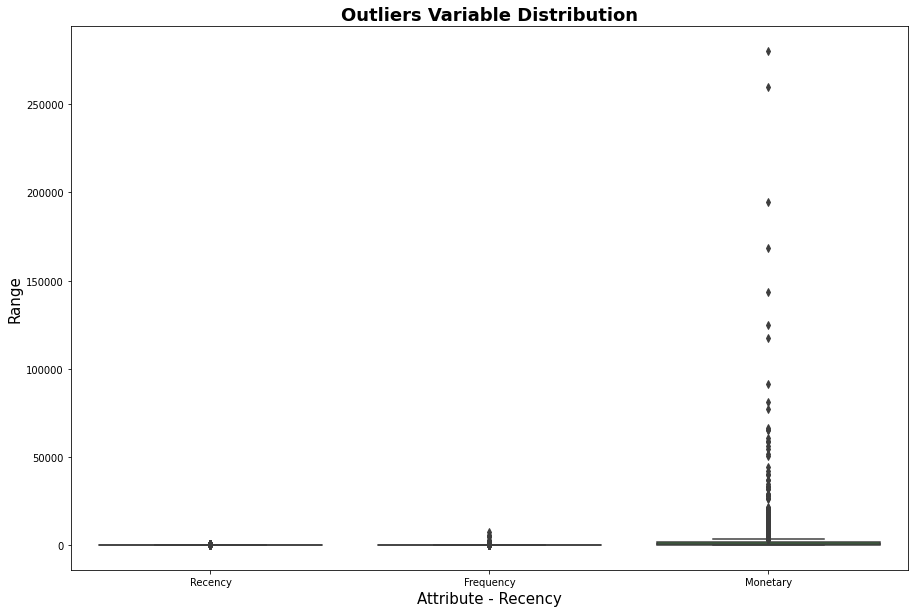

In [44]:
# Box plot of Recency, Frequency and Monetary
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", size = 18, weight = 'bold')
plt.ylabel("Range", size = 15)
plt.xlabel("Attribute - Recency", size = 15)

### **Removing the outliers**
* **In order to drop the outliers here we using IQR to finding out how many outliers are there to drop them.**

In [45]:
# removing (statistical) outliers
# outlier treatment for Recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df [(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

# outlier treatment for Monetary
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]


Text(0.5, 0, 'Attribute - Recency')

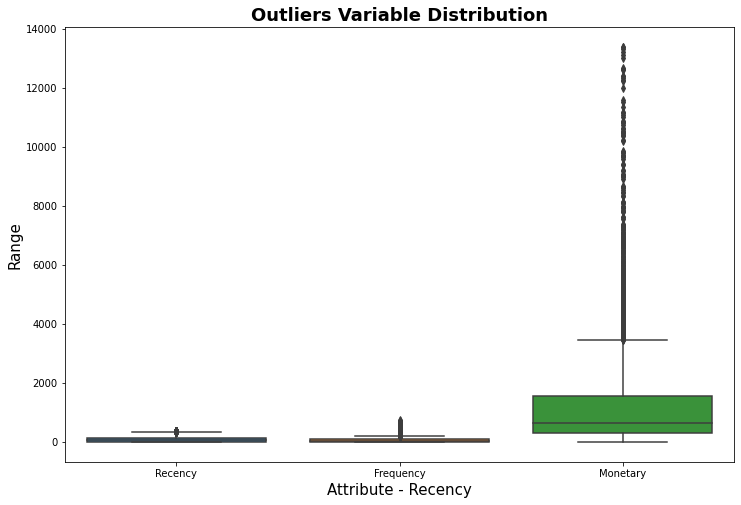

In [46]:
# After removing outliers again check the boxplot for Recency, Frequency and Monetary
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", size = 18, weight = 'bold')
plt.ylabel("Range", size = 15)
plt.xlabel("Attribute - Recency", size = 15)

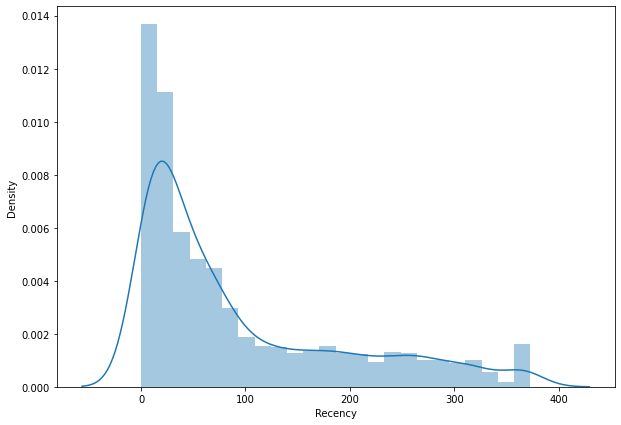

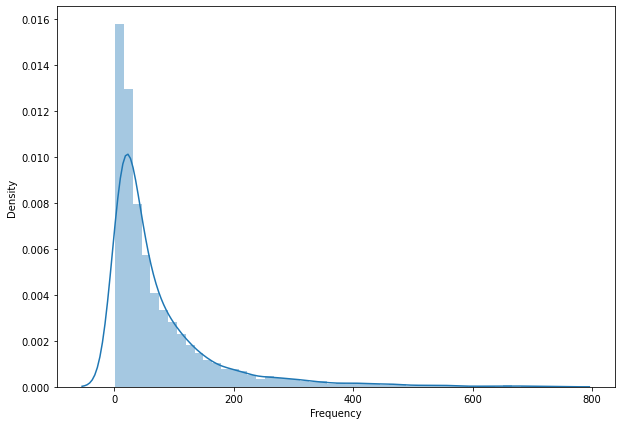

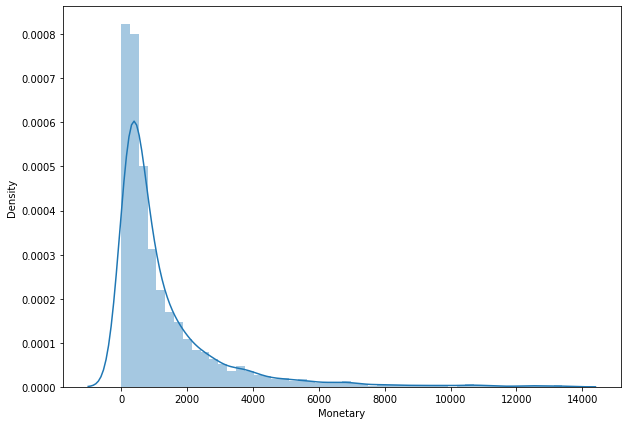

In [47]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(10,7))
sns.distplot(x)

#Frequency distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(10,7))
sns.distplot(x)

#Monetary distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(10,7))
sns.distplot(x)

### **All distplots are right skewed data or positively skewed**
### **From recency its says that there is a huge set of customer who comes very frequently to purchase**

In [48]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

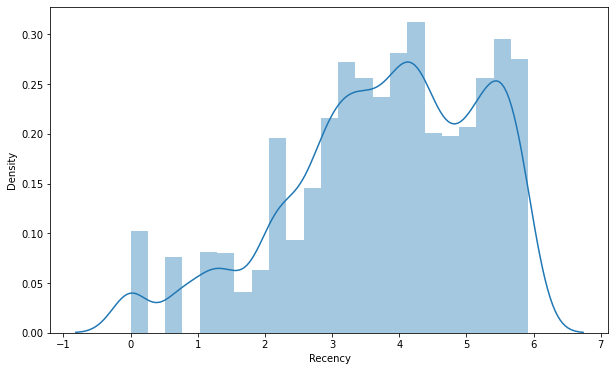

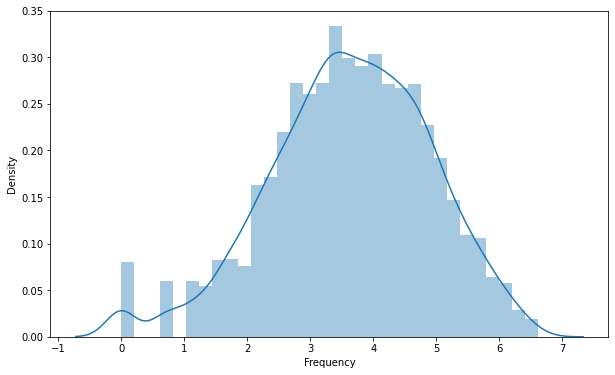

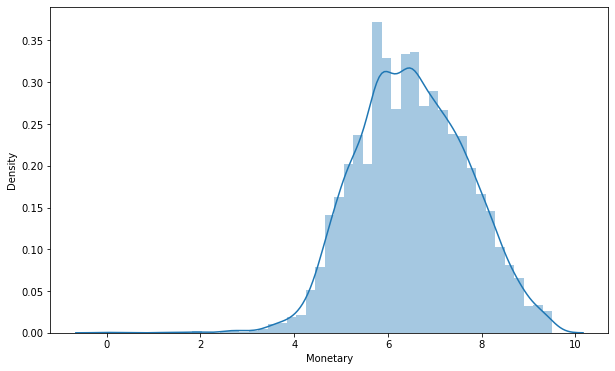

In [49]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,6))
sns.distplot(Recency_Plot)

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(Frequency_Plot)

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(Monetary_Plot)

### **Split into four segments using quantiles**

In [50]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Frequency': {0.25: 17.0, 0.5: 39.0, 0.75: 95.0},
 'Monetary': {0.25: 302.5775, 0.5: 651.745, 0.75: 1564.6025},
 'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 145.0}}

In [51]:
#Functions to create R, F and M segments
def RScoring(x,p,d):                      # everyday to come to store the best is the customer ,here 1 is best and 4 is worst
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):                    # the higher the product purchasing is the best customer, here 4 is worst and 1 is best
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [52]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,1,2,1
12350.0,310,17,334.40,4,4,3
12352.0,36,85,2506.04,2,2,1


In [53]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,1,2,1,121,4
12350.0,310,17,334.40,4,4,3,443,11
12352.0,36,85,2506.04,2,2,1,221,5


In [54]:
# Assign Loyalty level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_df.RFMScore, q =4, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
1,12348.0,75,31,1797.24,3,3,1,331,7,Gold
2,12349.0,18,73,1757.55,1,2,1,121,4,Platinum
3,12350.0,310,17,334.40,4,4,3,443,11,Bronze
4,12352.0,36,85,2506.04,2,2,1,221,5,Platinum


In [55]:
#RFMScore Loyalty_Level is Platinum then they are my best set of customer
print(rfm_df[rfm_df['RFMScore']<= 5].sort_values('Monetary', ascending = False).reset_index().head(10))
rfm_df[rfm_df['RFMScore'] <= 5].shape

   CustomerID  Recency  Frequency  ...  RFMGroup  RFMScore  RFM_Loyalty_Level
0     12540.0       19        478  ...       211         4           Platinum
1     12433.0        1        420  ...       111         3           Platinum
2     15498.0        2        512  ...       111         3           Platinum
3     12477.0       22        300  ...       211         4           Platinum
4     17735.0        2        690  ...       111         3           Platinum
5     16525.0        2        183  ...       111         3           Platinum
6     14258.0        9        111  ...       111         3           Platinum
7     13078.0        3        358  ...       111         3           Platinum
8     12536.0       43        261  ...       211         4           Platinum
9     15640.0        4        476  ...       111         3           Platinum

[10 rows x 10 columns]


(1238, 9)

### **this 1238 are valuable customers for the market.**

# **MODELLING**

#### **K-MEANS CLUSTERING**



In [56]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [57]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39408103379054493
For n_clusters = 3 The average silhouette_score is : 0.29475936365115435
For n_clusters = 4 The average silhouette_score is : 0.2975051811313832
For n_clusters = 5 The average silhouette_score is : 0.28291048922517165
For n_clusters = 6 The average silhouette_score is : 0.2624852862941338
For n_clusters = 7 The average silhouette_score is : 0.2678763390373605
For n_clusters = 8 The average silhouette_score is : 0.2685289240195684


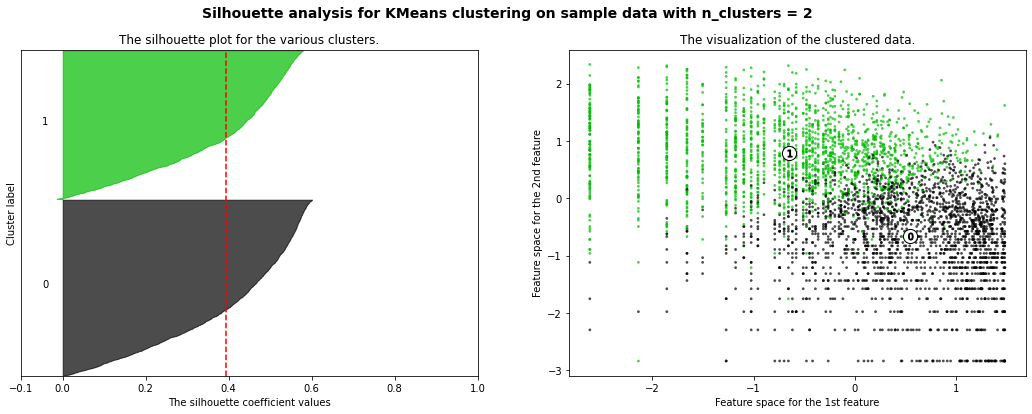

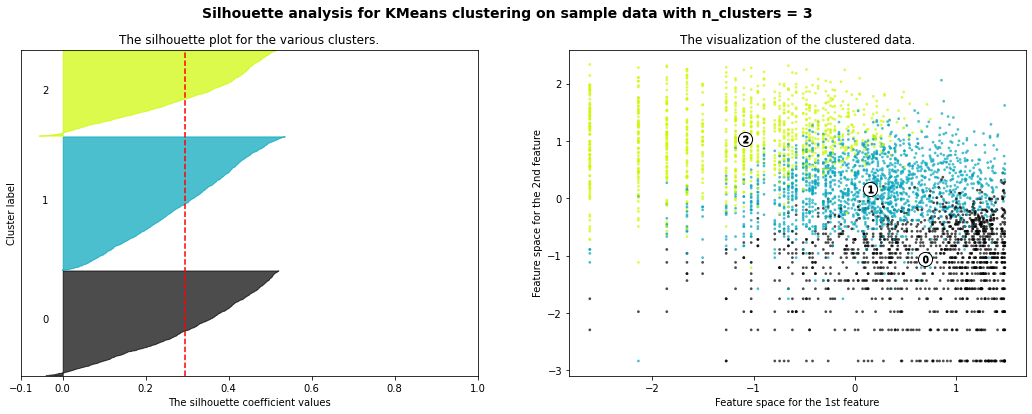

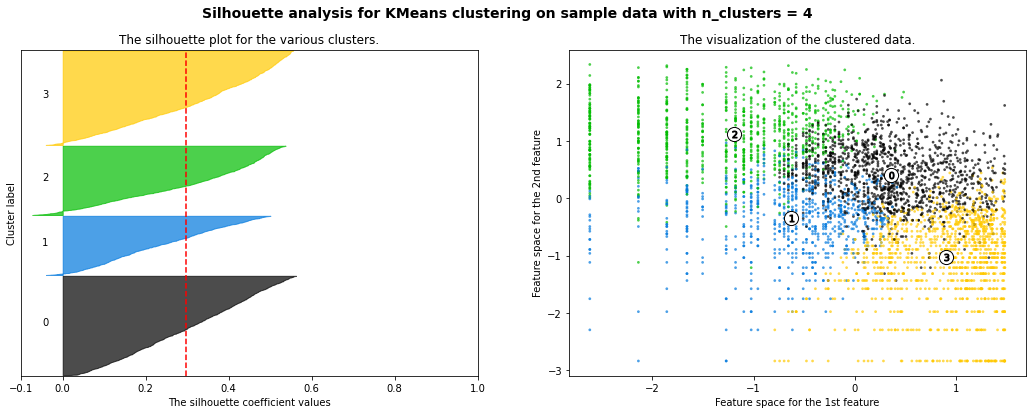

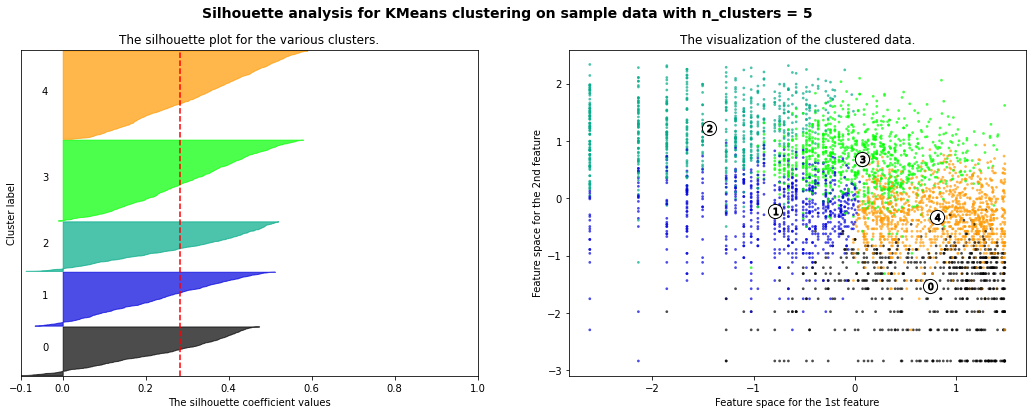

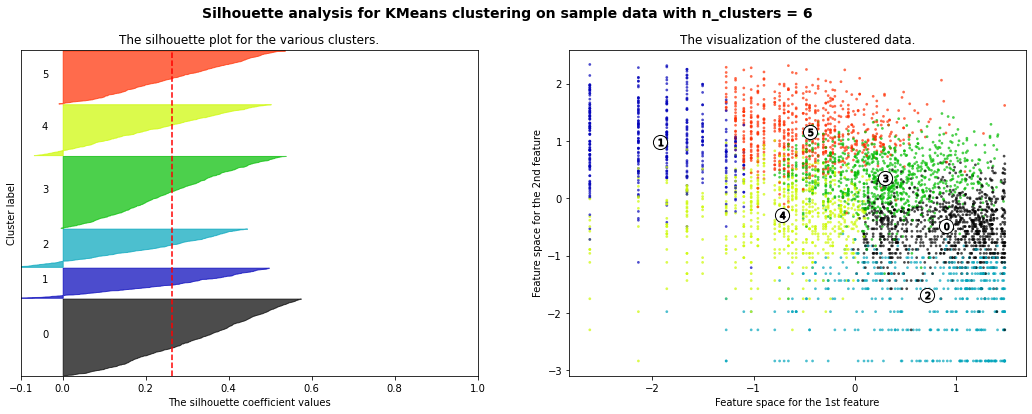

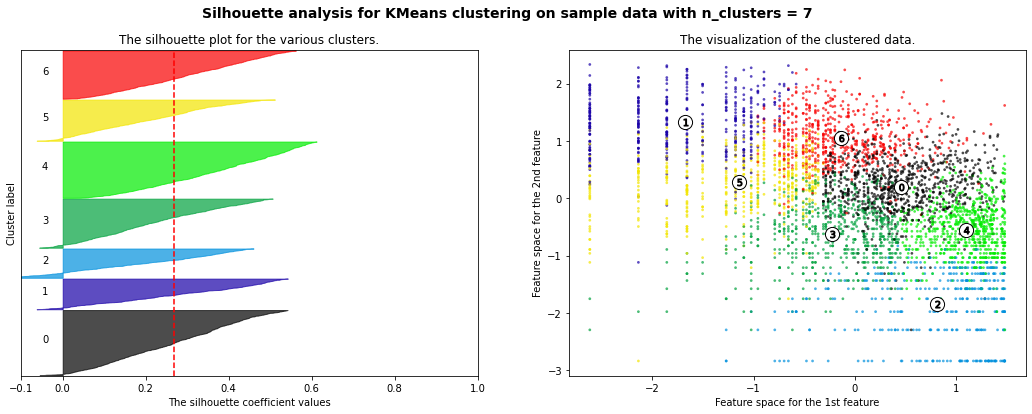

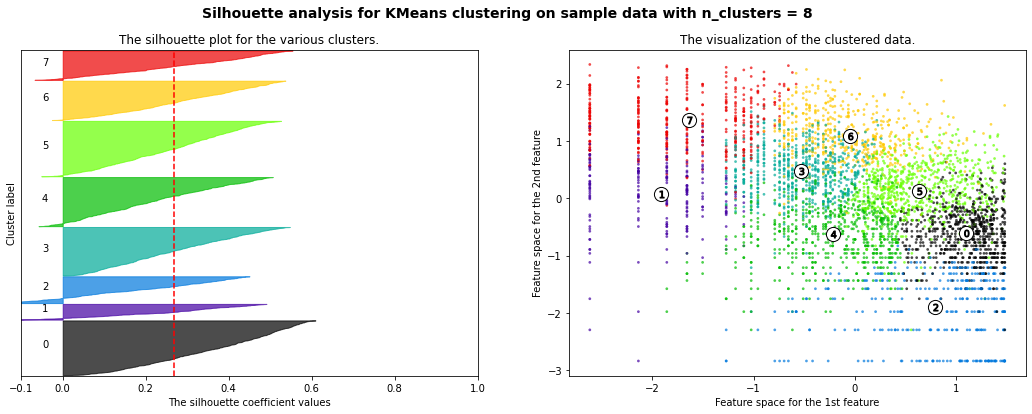

In [59]:
from sklearn.metrics import silhouette_score                    #the silhouette code you will get from the google
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **Applying Elbow Method on Recency ,Frequency and Monetary**

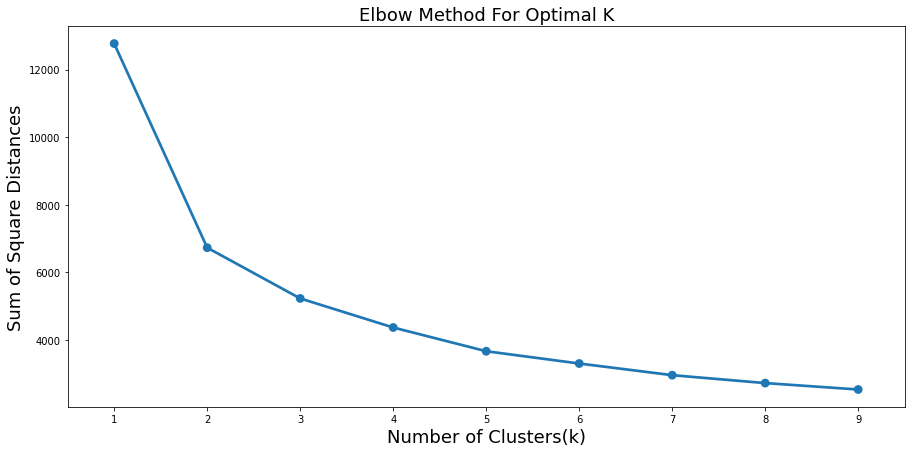

In [66]:
sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)', SIZE = 18)
plt.ylabel('Sum of Square Distances', SIZE = 18)
plt.title('Elbow Method For Optimal K', SIZE = 18)
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

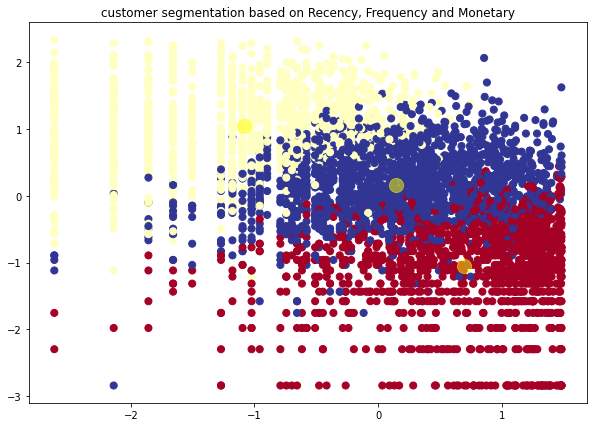

In [64]:
plt.figure(figsize=(10,7))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### **We see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

In [67]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)  # KMeans with 3 clusters
KMean_clust.fit(X)        # Fitting the model to the data

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,2
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,1,2,1,121,4,Platinum,2.890372,4.290459,7.471676,2
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,2
12353.0,204,4,89.00,4,4,4,444,12,Bronze,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,Bronze,5.365976,2.564949,6.129921,1
12356.0,22,59,2811.43,2,2,1,221,5,Platinum,3.091042,4.077537,7.941449,2


### **Cluster Profiling**

In [68]:
# Grouping by clusters to understand the profiles
rfm_df.groupby('Cluster').mean()

,Recency,Frequency,Monetary,R,F,M,RFMScore,Recency_log,Frequency_log,Monetary_log
Cluster,,,,,,,,,,
0,83.464245,56.866061,941.576199,2.583428,2.327469,2.373439,7.284336,3.997833,3.834743,6.616330
1,169.539752,13.161196,264.031007,3.285923,3.719912,3.639679,10.645514,4.777714,2.275371,5.337081
2,16.470169,181.433660,3153.405619,1.365093,1.331256,1.307213,4.003562,2.217922,4.949633,7.797269


In [69]:
# Number of customers belonging to each cluster
rfm_df['Cluster'].value_counts()

0    1762
1    1371
2    1123
Name: Cluster, dtype: int64

### <b> cluster 0 comprises of customers who are very recent, frequent and also contribute largely to the sales.

### <b> Cluster 1 comprises of customers who are moderately recent, frequent and contribute an average amount to sales

### <b> Cluster 2 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.

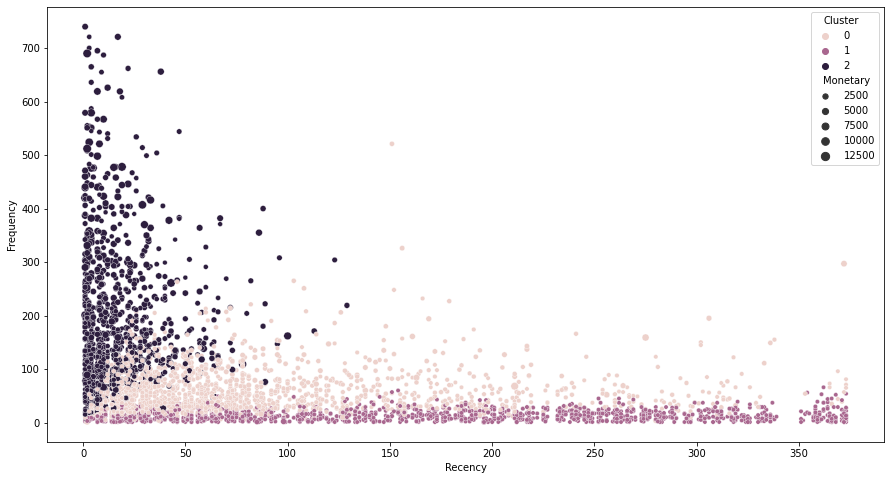

In [70]:
# Creating a scatter plot to understand the clusters visually
plt.figure(figsize = (15,8))
sns.scatterplot(x = rfm_df['Recency'], y = rfm_df['Frequency'], size= rfm_df['Monetary'], hue = rfm_df['Cluster'])

###**Dendogram to find the optimal number of clusters**

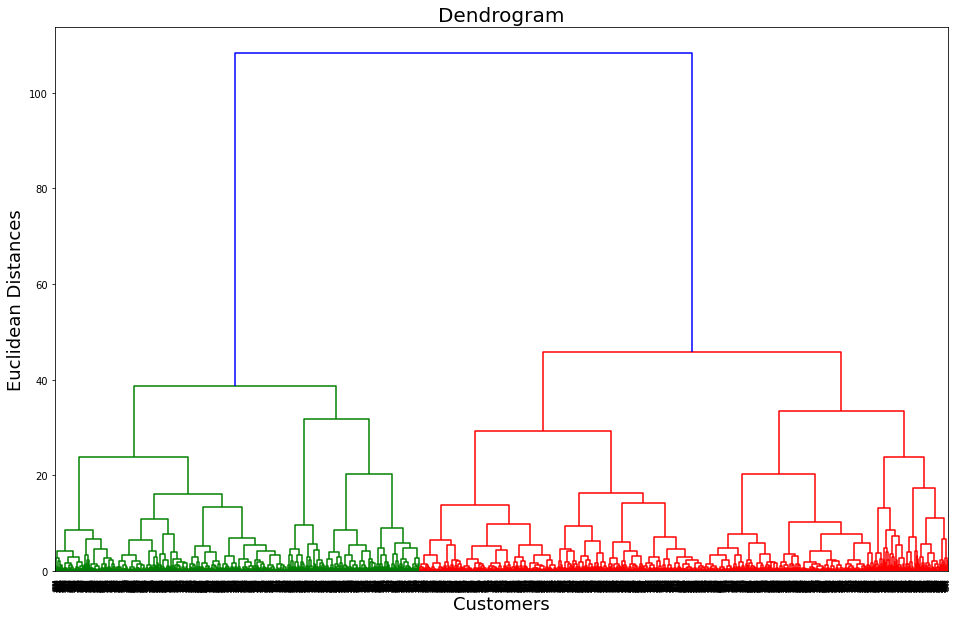

In [73]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram', SIZE= 20)
plt.xlabel('Customers',SIZE= 18)
plt.ylabel('Euclidean Distances', SIZE= 18)
plt.show()

#### **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold = 50**


# **No. of Cluster = 3**

In [85]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

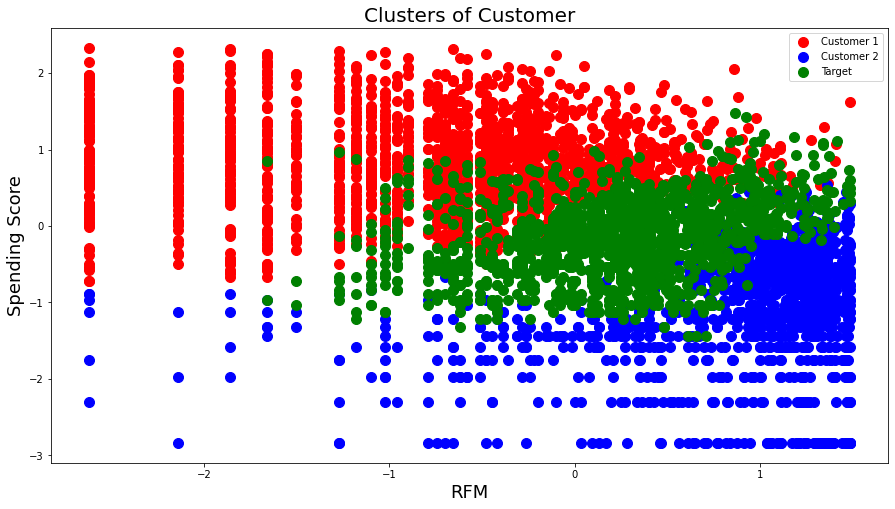

In [87]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer', size = 20)
plt.xlabel('RFM', size =18)

plt.ylabel('Spending Score', size = 18)
plt.legend()
plt.show()

### **By applying different clustering algorithem to our dataset, we get the optimal number of cluster is equal to 3. As we see they are overlap to each other we increase the number of cluster to 4.**

# **NOTE: The maximum number of cluster the better the seperation of the two or multiple cluster**

In [88]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

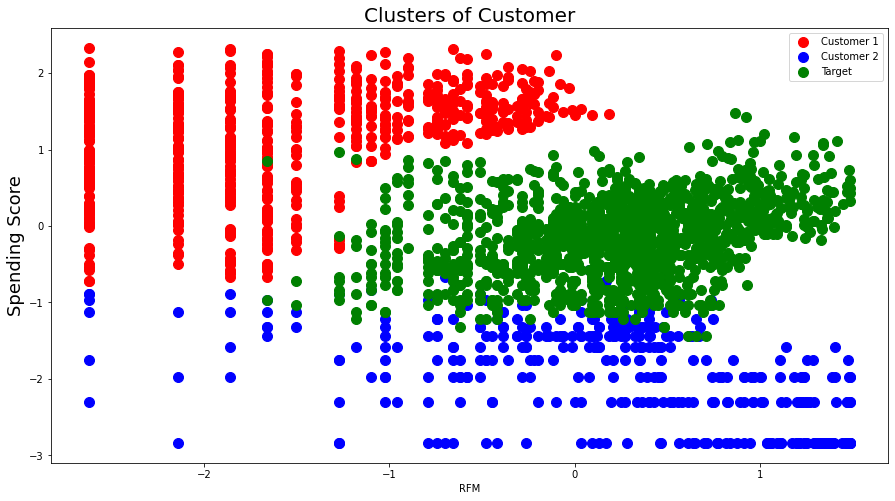

In [89]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer', size = 20)
plt.xlabel('RFM')

plt.ylabel('Spending Score', size = 18)
plt.legend()
plt.show()

### **Now we see that as we increase the number of cluster, the data dots are well seperated.** 

# **Summary**

In [91]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "3"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RFM", "3"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "3"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "5"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  | RFM  |             3             |
|   2    |  K-Means with Elbow methos     | RFM  |             3             |
|   3    |   Hierarchical clustering      | RFM  |             3             |
|   3    |   Hierarchical clustering      | RFM  |             5             |
+--------+--------------------------------+------+---------------------------+


### **Conclusion:**
* ### **Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.**

* ### **we saw how we can segment our customer depending on our business requirements. We perform RFM for our entire customer base**

* ### **RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest.**

* ### **Using cluster profiling the average of recency, frequency and monetary values for each customer segment was identified.**

* ### **We used the K-means algorithm to segment our customer in various clusters having similar similarity. K-means did a pretty good job here, Also we remember that the more the number of cluster we take the better the result we get (seperation of multiple cluster).**